In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] = boston.target

y = bos['price']
X = bos.drop(['price'], axis = 1)

## Lasso Regression

In [8]:
lasso = Lasso(alpha = 1)

lasso.fit(X,y)

pd.DataFrame(lasso.coef_, X.columns, columns = ['Coeffs'])

,Coeffs
CRIM,-0.063437
ZN,0.049165
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,0.949811
AGE,0.020910
DIS,-0.668790
RAD,0.264206
TAX,-0.015212


In [9]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lasso.predict(X)

r2_score(y, y_pred)

0.6825842212709925

### Simulation to Examine the impact of Alpha on coefficients through Lasso

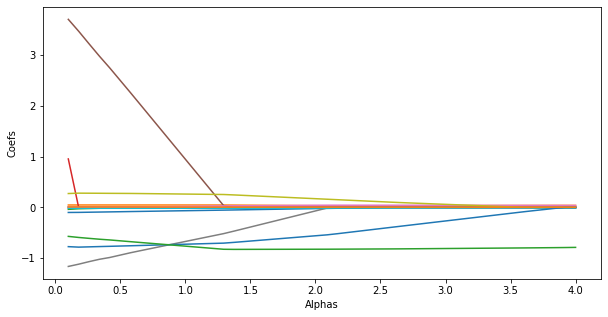

In [13]:
n_alpha = 50
alphas = np.linspace(0.1, 4)
coefs = []
model = Lasso()

for a in alphas:
    model.set_params(alpha = a)
    model.fit(X,y)
    coefs.append(model.coef_)
    
plt.figure(figsize = (10,5))
plt.plot(alphas, coefs)
plt.xlabel('Alphas')
plt.ylabel('Coefs')
plt.show()

The chart shows that set some coefficient to 0. This property can be used for feature selection. Hence, Lasso is one of the feature selection technique.

### Ideally Find the best alpha using Cross Validation

In [14]:
n_alphas = 50
alphas = np.linspace(0.1, 1, n_alphas)

lasso_cv = LassoCV(alphas = alphas, cv = 3, random_state = 1)

lasso_cv.fit(X,y)

LassoCV(alphas=array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102...
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
        verbose=False)

In [15]:
## Best Alpha
lasso_cv.alpha_

0.15510204081632656

In [16]:
lasso = Lasso(alpha = 0.15510204081632656)

lasso.fit(X,y)

pd.DataFrame(lasso.coef_, X.columns, columns = ['Coeffs'])

,Coeffs
CRIM,-0.097346
ZN,0.049491
INDUS,-0.026513
CHAS,0.075099
NOX,-0.000000
RM,3.544272
AGE,-0.006972
DIS,-1.131069
RAD,0.281643
TAX,-0.015085


In [17]:
y_pred = lasso.predict(X)

r2_score(y, y_pred)

0.7238138703081223

### Ridge Regression

In [19]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X,y)

pd.DataFrame(ridge.coef_, X.columns, columns = ['Coeffs'])

,Coeffs
CRIM,-0.105866
ZN,0.047041
INDUS,0.002252
CHAS,2.612117
NOX,-13.416261
RM,3.840757
AGE,-0.003144
DIS,-1.411491
RAD,0.295989
TAX,-0.012686


### Simulation to Examine the impact of Alpha on coefficients through Ridge

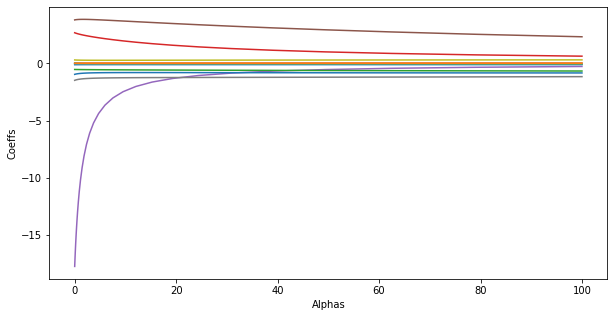

In [21]:
n_alphas = 50

alphas = np.logspace(-3, 2, n_alphas)

coefs = []
model =Ridge()

for a in alphas:
    model.set_params(alpha = a)
    model.fit(X,y)
    coefs.append(model.coef_)
    
plt.figure(figsize = (10,5))
plt.plot(alphas, coefs)
plt.xlabel('Alphas')
plt.ylabel('Coeffs')
plt.show()

## Identifying the best alpha through RIDGECV

In [29]:
n_alphas = 100

alphas = np.logspace(2, 3, n_alphas)

ridge = RidgeCV(alphas = alphas, cv = 3)

ridge.fit(X, y)

ridge.alpha_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


278.2559402207126

In [30]:
ridge = Ridge(alpha = 278.2559402207126)
ridge.fit(X,y)

pd.DataFrame(ridge.coef_, X.columns, columns = ['Coeffs'])

,Coeffs
CRIM,-0.099525
ZN,0.055621
INDUS,-0.049657
CHAS,0.289713
NOX,-0.086218
RM,1.378972
AGE,0.013585
DIS,-0.986865
RAD,0.331143
TAX,-0.016643


In [31]:
y_pred = ridge.predict(X)

r2_score(y, y_pred)

0.7015194550542536

## Elastic Net

Elastic net is the combination of Ridge and Lasso. It is developed to bring the the advantages of Ridge and Lasso

In [32]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [33]:
enet = ElasticNet(alpha = 0.1)
enet.fit(X,y)

pd.DataFrame(enet.coef_, X.columns, columns = ['Coeffs'])

,Coeffs
CRIM,-0.100079
ZN,0.051377
INDUS,-0.045901
CHAS,0.987970
NOX,-0.059533
RM,3.252662
AGE,-0.007219
DIS,-1.181402
RAD,0.288726
TAX,-0.014952


## Simulation to understand the impact of Alphas on  coefficents through Elasticnet

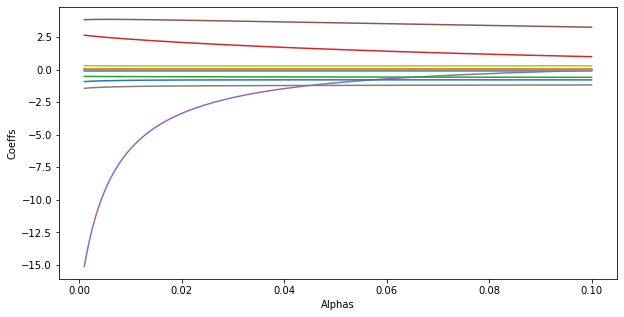

In [35]:
n_alphas = 200

alphas = np.logspace(-3, -1, n_alphas)

coeffs = []

model = ElasticNet()

for a in alphas:
    model.set_params(alpha = a)
    model.fit(X,y)
    coeffs.append(model.coef_)
    
plt.figure(figsize = (10,5))
plt.plot(alphas, coeffs)
plt.xlabel('Alphas')
plt.ylabel('Coeffs')
plt.show()

In [39]:
n_alphas = 500

alphas = np.logspace(-3, 0, n_alphas)
encv = ElasticNetCV(alphas = alphas, cv=3, random_state = 1)
encv.fit(X,y)

encv.alpha_

0.32585624761532267

In [40]:
enet = ElasticNet(alpha = 0.32585624761532267)
enet.fit(X,y)

pd.DataFrame(enet.coef_, X.columns, columns = ['Coeffs'])

,Coeffs
CRIM,-0.096734
ZN,0.053682
INDUS,-0.036935
CHAS,0.027582
NOX,-0.000000
RM,2.215472
AGE,0.003700
DIS,-1.077334
RAD,0.309470
TAX,-0.016063


In [41]:
y_pred = enet.predict(X)

r2_score(y, y_pred)

0.713431582108291